In [30]:
import pandas as pd
def convertListDF_toflaotDF(df):
    
    list_AUCs = []
    for i in range(df.shape[0]):
        list_temp = df.iloc[i,:]
        list_temp = [float(list_temp[k][1:-1]) for k in range(df.shape[1])]
        list_AUCs.append(list_temp)
    return pd.DataFrame(list_AUCs,index = ['slider', 'fan', 'pump', 'valve'], columns = ['id_00','id_02', 'id_04', 'id_06']) 

Spectrogram AUC :
   - Latent space dim = 18
   - AE : (64,64,18,64,64) Relu

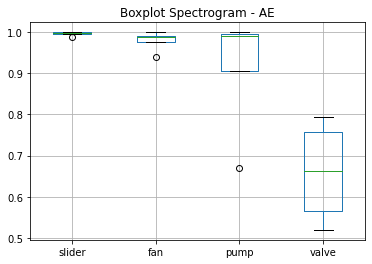

In [111]:
df_spectro = pd.read_csv('latent_space_param_AUC.csv', index_col=[0])
df_spectro = convertListDF_toflaotDF(df_spectro)

import matplotlib.pyplot as plt
myFig = plt.figure();
fig = df_spectro.transpose().boxplot(return_type='axes')
plt.title('Boxplot Spectrogram - AE')
plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1])
myFig.savefig('Spectro_boxplot.png', format="png")

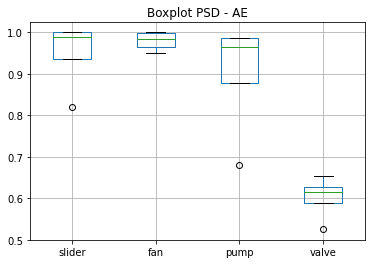

In [112]:
df_PSD = pd.read_csv('latent_space_param_AUC_PSD.csv', index_col=[0])
df_PSD = convertListDF_toflaotDF(df_PSD)

import matplotlib.pyplot as plt
myFig = plt.figure();
fig = df_PSD.transpose().boxplot(return_type='axes')
plt.title('Boxplot PSD - AE')
plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1])
myFig.savefig('PSD_boxplot.png', format="png")

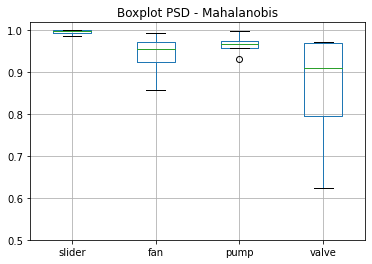

In [100]:
df_mahala = pd.read_csv('MAHALANOBIS-PSD.csv', index_col=[0])
df_mahala = convertListDF_toflaotDF(df_mahala)

import matplotlib.pyplot as plt
myFig = plt.figure();
fig = df_mahala.transpose().boxplot(return_type='axes')
plt.title('Boxplot PSD - Mahalanobis')
plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1])
myFig.savefig('MIMII_PSD_mahala.png', format="png")

Look up how to compute the means for perf comparison

In [46]:
df_spectro.iloc[3,:]

id_00    0.519243
id_02    0.744236
id_04    0.793611
id_06    0.581181
Name: valve, dtype: float64

In [47]:
df_spectro.iloc[3,:].mean()

0.6595676922729876

In [50]:
from statistics import harmonic_mean
harmonic_mean(df_spectro.iloc[3,:])

0.6399755394558804

In [51]:
harmonic_mean(df_mahala.iloc[3,:])

0.8266022674278107

Create the baseline MIMII dataset :
 - Order of the lists : slider, fan, pump, valve
 - Based on the AUC from https://deepai.org/publication/mimii-dataset-sound-dataset-for-malfunctioning-industrial-machine-investigation-and-inspection

In [63]:
MIMII_lists = [[0.99,0.93,0.88,0.71], [0.75,0.99,0.92,0.99], [0.84,0.45,0.99,0.94], [0.68,0.66,0.64,0.70]]
df_MIMII = pd.DataFrame(MIMII_lists,index = ['slider', 'fan', 'pump', 'valve'], columns = ['id_00','id_02', 'id_04', 'id_06']) 
df_MIMII

,id_00,id_02,id_04,id_06
slider,0.99,0.93,0.88,0.71
fan,0.75,0.99,0.92,0.99
pump,0.84,0.45,0.99,0.94
valve,0.68,0.66,0.64,0.70


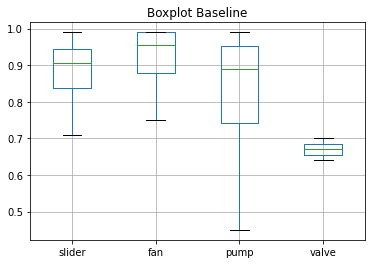

In [105]:
import matplotlib.pyplot as plt
myFig = plt.figure();
fig = df_MIMII.transpose().boxplot(return_type='axes')
plt.title('Boxplot Baseline')
plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1])
myFig.savefig('MIMII_boxplot.png', format="png")

Make the 2 bar plot comparison :
 1) MIMII, Spectro , PSD
 2) Spectro, Mahalanobis

In [64]:
# Créer une fonction qui prend **kwargs et output le correct dataset selon !

def MeanListGenerator(df):
    """ Receive a df and output a the harmonic mean of each raw as harmonic mean """
    Mean_list = []
    for i in range(df.shape[0]):
        list_temp = df.iloc[i,:]
        Mean_list.append(harmonic_mean(list_temp))
    return Mean_list

                         
list_spectro = MeanListGenerator(df_spectro)
list_PSD = MeanListGenerator(df_PSD)
list_mahala = MeanListGenerator(df_mahala)
list_MIMII = MeanListGenerator(df_MIMII)

<AxesSubplot:title={'center':'Performance comparison'}, ylabel='AUC'>

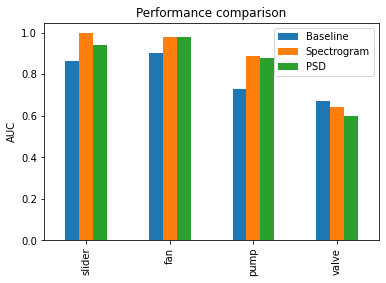

In [72]:
df_comparison_baseline = pd.DataFrame([list_MIMII,list_spectro, list_PSD],index = ['Baseline','Spectrogram','PSD'],  columns = ['slider', 'fan', 'pump', 'valve'])
df_comparison_baseline = df_comparison_baseline.transpose()
df_comparison_baseline.plot.bar(title='Performance comparison', ylabel='AUC')

<AxesSubplot:>

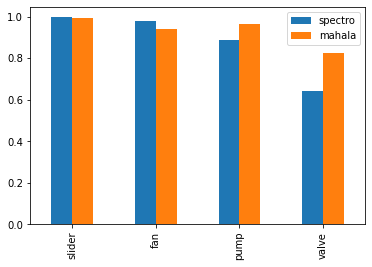

In [107]:
df_comparison_baseline = pd.DataFrame([list_spectro, list_mahala],index = ['spectro','mahala'],  columns = ['slider', 'fan', 'pump', 'valve'])
df_comparison_baseline = df_comparison_baseline.transpose()
df_comparison_baseline.plot.bar()

<AxesSubplot:>

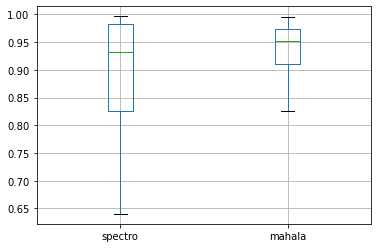

In [108]:
df_comparison_baseline.boxplot()

- Create a code to get the standard deviation providing the harmonic mean
- Create box plot to represent the deviation of each implementation
- Add title and savefig